# # Bank Stock Price Analysis Project

PURPOSE: To unlock the data of stock prices and to focus on exploratory data analysis of stock prices and to enhance the visualization skills and pandas skills.


End Result: This Project is just meant to practise visualization and pandas skills. It's not meant to be a robust financial analysis or be taken as financial advice.

The Imports

In [59]:
from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import plotly
import cufflinks as cs
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
cs.go_offline()

In [17]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Data
We need to get data using pandas datareader. Information for the following banks:

Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo

In [18]:
BAC = data.DataReader('BAC','yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [19]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.425114
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.059509
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.103382
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.052204
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.074108


# ** Creating a list of the ticker symbols (as strings) in alphabetical order.

In [20]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Useing pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.

In [21]:
bank_stock = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1, keys = tickers)

In [22]:
bank_stock.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.103382   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.052204   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.074108   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.786667  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.811905  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.912865  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.950710  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.341850  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.658106  
2006-01-04  31.530001  10870000.0  20.418499  
2006-01-05  31.495001  10158000.0  20.395836  
2006-01-06  31.680000   8403800.0  20.515644  
2006-01-09  31.674999   5619600.0  20.512400  

[5 rows x 36 columns]

** Set the column name levels

In [23]:
bank_stock.columns.names = ['Bank Tickers','Stock Info']

the head of the bank_stocks dataframe.**

In [24]:
bank_stock.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.059509  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.103382  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.052204  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.074108  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  36.786667  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  36.811905  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  36.912865  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  36.950710  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.341850  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.658106  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.418499  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.395836  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.515644  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.512400  

[5 rows x 36 columns]

** What is the max Close price for each bank's stock throughout the time period?**

In [25]:
bank_stock.xs(key = 'Close',axis = 1,level = 'Stock Info').max()

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

 Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. 

In [26]:
returns = pd.DataFrame()

useing pandas pct_change() method on the Close column to create a column representing this return value.

In [28]:
for tick in tickers:
    returns[tick + 'returns'] = bank_stock[tick]['Close'].pct_change()

In [29]:
returns.head()

,BACreturns,Creturns,GSreturns,JPMreturns,MSreturns,WFCreturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


 Creating a pairplot using seaborn of the returns dataframe. What stock stands out to you?

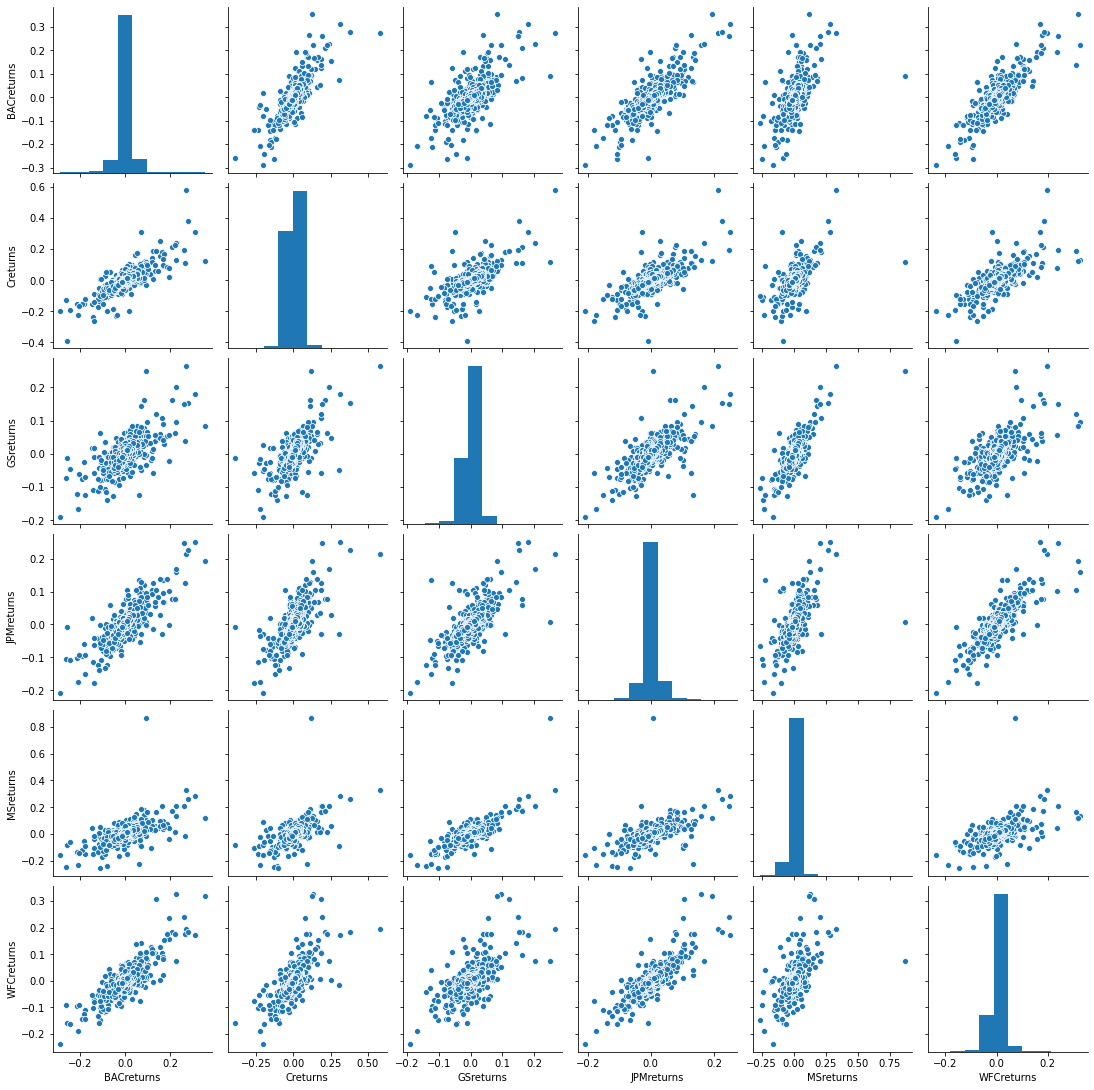

In [32]:
sns.pairplot(returns[1:])

Using this returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns.

In [34]:
returns.idxmin()

BACreturns   2009-01-20
Creturns     2009-02-27
GSreturns    2009-01-20
JPMreturns   2009-01-20
MSreturns    2008-10-09
WFCreturns   2009-01-20
dtype: datetime64[ns]

In [36]:
returns.idxmax()

BACreturns   2009-04-09
Creturns     2008-11-24
GSreturns    2008-11-24
JPMreturns   2009-01-21
MSreturns    2008-10-13
WFCreturns   2008-07-16
dtype: datetime64[ns]

A look at the standard deviation of the returns, stock would classify as the riskiest over the entire time period? 

In [45]:
returns.std()

BACreturns    0.036647
Creturns      0.038672
GSreturns     0.025390
JPMreturns    0.027667
MSreturns     0.037819
WFCreturns    0.030238
dtype: float64

Creating a line plot showing Close price for each bank for the entire index of time.

In [49]:
bank_stock.xs(key = 'Close',axis=1,level='Stock Info').iplot()

Creating a heatmap of the correlation between the stocks Close Price.

In [53]:
bank_stock.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Tickers,BAC,C,GS,JPM,MS,WFC
Bank Tickers,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


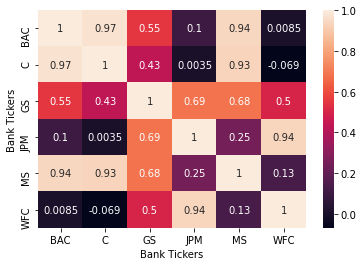

In [54]:
sns.heatmap(bank_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Cluster map

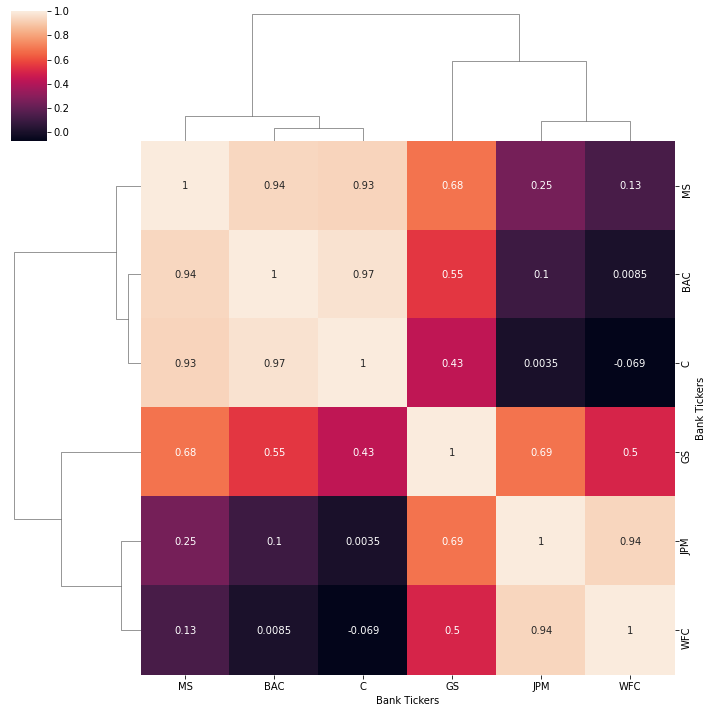

In [56]:
sns.clustermap(bank_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# using Plotly for visulization

In [57]:
close_corr = bank_stock.xs(key='Close',axis=1,level='Stock Info').corr()

In [69]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Thank you.
Purpose is to enhance the visualization skills.